In [1]:
using PyPlot

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = zeros(N*K,D) # data matrix (each row = single example)
y = zeros(Int64, N*K) # class labels
for j in range(1,K)
    idx = range(1+N*(j-1), N); #index for X and Y
    r = linspace(0.0,1,N); # radius
    t = linspace((j-1)*4,(j)*4,N) + randn(N)*0.2 # theta
    X[idx,:] = [r.*sin(t) r.*cos(t)]
    y[idx] = j;
end

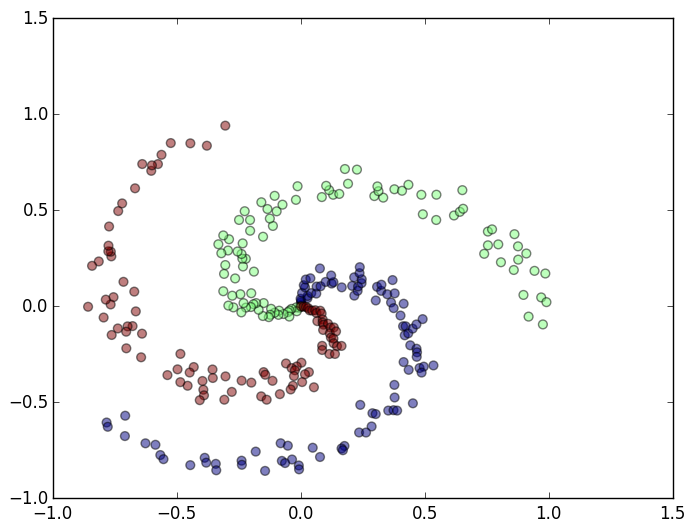

PyObject <matplotlib.collections.PathCollection object at 0x000000002ADD8C88>

In [3]:
# lets visualize the data:
scatter(X[:, 1], X[:, 2], s=40, c=y, alpha=0.5)

In [4]:
# initialize parameters randomly
h = 100 # size of hidden layer
W1 = 0.01 * randn(D,h)
b1 = zeros(1,h)
W2 = 0.01 * randn(h,K)
b2 = zeros(1,K)

1x3 Array{Float64,2}:
 0.0  0.0  0.0

In [5]:
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength


0.001

In [19]:
# gradient descent loop
num_examples = size(X,1);
for i in 1:10000

  # evaluate class scores, [N x K]
  hidden_layer = max(0, X*W1 .+ b1); # note, ReLU activation
  scores = hidden_layer*W2 .+ b2;

  # compute the class probabilities
  exp_scores = exp(scores);
  probs = exp_scores ./ sum(exp_scores, 2); # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -log(probs[:,y[]]);
  data_loss = sum(corect_logprobs)/num_examples;
  reg_loss = 0.5*reg*sum(W1.^2) + 0.5*reg*sum(W2.^2);
  loss = data_loss + reg_loss
  if i % 1000 == 0
        println("iteration: ", i," loss: ", loss);
  end
  # compute the gradient on scores
  dscores = probs;
    dscores[:,y[]] -= 1;
  dscores /= num_examples;

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = hidden_layer'*dscores
  db2 = sum(dscores, 1)
  # next backprop into hidden layer
  dhidden = dscores*W2'
    #println(hidden_layer)
    
  # backprop the ReLU non-linearity
  dhidden[hidden_layer .<= 0] = 0
  # finally into W,b
  dW1 = X'*dhidden
  db1 = sum(dhidden, 1)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW1 += reg * W1

  # perform a parameter update
  W1 += -step_size * dW1
  b1 += -step_size * db1
  W2 += -step_size * dW2
  b2 += -step_size * db2
end

iteration: 1000 loss: 0.0009230274953115696
iteration: 2000 loss: 0.0006252263409337218
iteration: 3000 loss: 0.0004785931392295031
iteration: 4000 loss: 0.00038875409958067026
iteration: 5000 loss: 0.0003271031547273439
iteration: 6000 loss: 0.0002817880564803491
iteration: 7000 loss: 0.00024690853805745796
iteration: 8000 loss: 0.0002191571422338731
iteration: 9000 loss: 0.00019651901858321676
iteration: 10000 loss: 0.00017768853280006655


In [26]:
# evaluate training set accuracy
hidden_layer = max(0, X*W1 .+ b1)
scores = hidden_layer*W2 .+ b2
predicted_class = zeros(size(scores,1))
for i in 1:size(scores,1)
    predicted_class[i] = indmax(scores[i,:])
end
correct = 0;
for i in 1:length(y)
    if y[i] == predicted_class[i]
        correct = correct + 1;
    end
end
println("training accuracy: ", correct/length(y))

training accuracy: 0.3333333333333333


In [31]:
b1

1x100 Array{Float64,2}:
 -0.00887294  -0.00586611  -0.00991801  â€¦  0.0612605  -0.00640979  0.495674

In [36]:

# plot the resulting classifier
h = 0.02;
x_min = minimum(X[:, 1]) - 1;
x_max = maximum(X[:, 1]) + 1;
y_min = minimum(X[:, 2]) - 1;
y_max = maximum(X[:, 2]) + 1;
numX = convert(Int, floor((x_max - x_min)/h));
xx = zeros(numX);
xx[1] = x_min;
yy = zeros(numX);
yy[1] = y_min;
for i in 2:numX
    xx[i] = xx[i-1] + h;
    yy[i] = yy[i-1] + h;
end
grid_x = [i for i in xx, j in yy];
grid_y = [j for i in xx, j in yy];
xy = [grid_x[:] grid_y[:]];
Z = (max(0, xy*W1) .+ b1)*W2 .+ b2
zz = zeros(size(z,1));
for i in 1:size(z,1)
    zz[i] = indmax(z[i,:])
end
zz = reshape(zz, size(grid_x));

LoadError: LoadError: MethodError: `isless` has no method matching isless(::Array{Any,2}, ::Int64)
Closest candidates are:
  isless(!Matched::AbstractFloat, ::Real)
  isless(!Matched::Real, ::Real)
  isless(!Matched::Char, ::Integer)
while loading In[36], in expression starting on line 20

In [ ]:
contourf(xx, yy, Z, cmap=get_cmap("Spectral"), alpha=0.8) 
scatter(X[:, 1], X[:, 2], c=y, s=40)